In [1]:
!gdown --id 113ayoSbRlo4r31SV2HxOmdGdowta4C3J
!gdown --id 114StdVzRxZDIYKUgHKQCgA_NZDK1jeoy
!gdown --id 111ld8nwsotEOMCOwcgSSDI_FEfj0cOgg

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:139: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=113ayoSbRlo4r31SV2HxOmdGdowta4C3J
To: /content/prachatai-train.csv
100% 7.86M/7.86M [00:01<00:00, 4.96MB/s]
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:139: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=114StdVzRxZDIYKUgHKQCgA_NZDK1jeoy
To: /content/prachatai-dev.csv
100% 990k/990k [00:00<00:00, 98.8MB/s]
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:139: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: 

# Preparation

## Load data

In [2]:
import pandas as pd

train_df = pd.read_csv("/content/prachatai-train.csv")
dev_df = pd.read_csv("/content/prachatai-dev.csv")
test_df = pd.read_csv("/content/prachatai-test.csv")

train_df.head(5)

,title tokens,label
0,กม|ธ.|แจง|มติ|เซ็ต|ซี|โร่| |กกต.|หวั่น|เป็น|ปล...,การเมือง
1,เสนอ|ตั้ง|เขต|ศก.|-|สังคม|พิเศษ| |6|จว.|ใต้,สิ่งแวดล้อม
2,เครือข่าย|แรงงาน| |–| |นักศึกษา| |ยื่น|หนังสือ...,ต่างประเทศ
3,วิญญาณ|หลอน|ของ|การ|ล้อม|สังหาร,การเมือง
4,ดีเอสไอ|ลง| |3|จว.|ใต้|หา|ข้อมูล|ก่อการร้าย,สิ่งแวดล้อม


## Info of each set of data

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37890 entries, 0 to 37889
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title tokens  37890 non-null  object
 1   label         37890 non-null  object
dtypes: object(2)
memory usage: 592.2+ KB


In [4]:
dev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4736 entries, 0 to 4735
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title tokens  4736 non-null   object
 1   label         4736 non-null   object
dtypes: object(2)
memory usage: 74.1+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4737 entries, 0 to 4736
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title tokens  4737 non-null   object
 1   label         4737 non-null   object
dtypes: object(2)
memory usage: 74.1+ KB


## Explore data

In [6]:
train_df['label'].unique()

array(['การเมือง', 'สิ่งแวดล้อม', 'ต่างประเทศ', 'คุณภาพชีวิต', 'เศรษฐกิจ',
       'สังคม'], dtype=object)

In [7]:
train_df['label'].value_counts()

,count
label,
การเมือง,26270
ต่างประเทศ,3794
สิ่งแวดล้อม,3788
คุณภาพชีวิต,2093
สังคม,1090
เศรษฐกิจ,855


## Preprocess data

### Train set

In [8]:
%pip install pythainlp

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import common

# Custom tokenizer
def custom_tokenizer(text):
    return text.split('|')

# Get the list of Thai stopwords
stop_words = list(common.thai_stopwords())

# Create bag-of-word
vectorizer = CountVectorizer(
    tokenizer=custom_tokenizer,
    stop_words=stop_words,
)
train_feature_vectors = vectorizer.fit_transform(train_df['title tokens'])

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


note: 
* `CountVectorizer()` creates a "bag of words" representation.
* `vectorizer.fit_transform()` learn vocab & params from data -> transform data into a numerical feature matrix
    1. `fit()` learn vocab & params from data
    2. `transform()` use params -> sparse matrix e.g. bag of words table
    
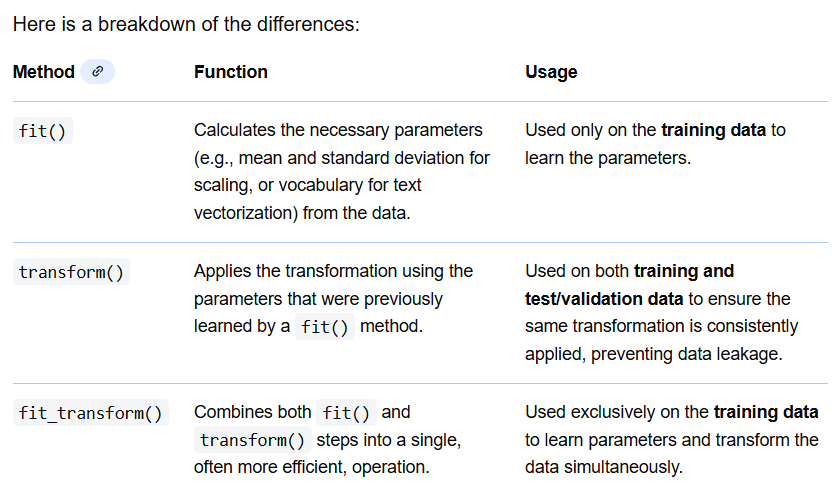 

In [10]:
vectorizer.vocabulary_

{'กม': 2905,
 'ธ.': 7910,
 'แจง': 17957,
 'มติ': 10838,
 'เซ็ต': 16361,
 'ซี': 6098,
 'โร่': 18898,
 ' ': 3,
 'กกต.': 2831,
 'หวั่น': 14689,
 'ปลา': 9250,
 '2': 741,
 'น้ำ': 8457,
 'ทำงาน': 7666,
 'ลำบาก': 12461,
 'ย้ำ': 11554,
 'ใบสั่ง': 19104,
 'คสช.': 4831,
 'เสนอ': 17450,
 'เขต': 15907,
 'ศก.': 13094,
 '-': 406,
 'สังคม': 13768,
 'พิเศษ': 10458,
 '6': 1156,
 'จว.': 5348,
 'เครือข่าย': 16008,
 'แรงงาน': 18327,
 '–': 19548,
 'นักศึกษา': 8167,
 'ยื่น': 11454,
 'หนังสือ': 14389,
 'ทูต': 7849,
 'อาร์เจนตินา': 15351,
 'กรณี': 2921,
 '“': 19640,
 'กุ': 3812,
 'ส': 13257,
 'ตา': 6895,
 'โว': 18932,
 'เว': 17348,
 'รา': 11932,
 '”': 19679,
 'ทำร้าย': 7691,
 'วิญญาณ': 12920,
 'หลอน': 14622,
 'ล้อม': 12644,
 'สังหาร': 13784,
 'ดีเอสไอ': 6493,
 '3': 939,
 'หา': 14777,
 'ข้อมูล': 4207,
 'ก่อการร้าย': 3850,
 '‘': 19550,
 'ความยุติธรรม': 4662,
 '’': 19629,
 '(': 363,
 'justice': 2016,
 '):': 392,
 'อัตวิสัย': 15211,
 'subjective': 2553,
 ')': 387,
 'ภววิสัย': 10672,
 'objective': 2227,
 ')?': 393

### Test set

In [30]:
import pandas as pd

total_samples = 120

n_classes = test_df['label'].nunique()

samples_per_class = total_samples // n_classes

test_rand_df = test_df.groupby('label', group_keys=False).apply(lambda x: x.sample(samples_per_class, random_state=42))

print(test_rand_df['label'].value_counts())
print(f"Total rows: {len(test_rand_df)}")

label
การเมือง       20
คุณภาพชีวิต    20
ต่างประเทศ     20
สังคม          20
สิ่งแวดล้อม    20
เศรษฐกิจ       20
Name: count, dtype: int64
Total rows: 120


/tmp/ipython-input-623556136.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_rand_df = test_df.groupby('label', group_keys=False).apply(lambda x: x.sample(samples_per_class, random_state=42))


In [31]:
test_rand_df.head()

,title tokens,label
3172,"ส.ว.|สรร|หาไม่|พอใจ| |""|ออง| |ซาน| |ซูจี|""| |ท...",การเมือง
3992,(|อัพเดท|)| |นปช.|ยัน|ยัง|ไม่|เคลื่อนไหว|-|ชี้...,การเมือง
2366,"นักวิเคราะห์|เล็ง| |""|ใบแดง|""| |จาก| |กกต.|พลิ...",การเมือง
2361,เผย|มติ| |7| |ต่อ| |4| |เสียง| |คตส|.|อายัดทรั...,การเมือง
4662,กลุ่ม|สหภาพแรงงาน|กลุ่ม|ย่าน|รังสิต|ฯ| |ร้อง|ป...,การเมือง


# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

lr_text_classifier = LogisticRegression()
lr_text_classifier.fit(train_feature_vectors, train_df['label'])

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Evaluation

In [32]:
from sklearn.metrics import classification_report

test_feature_vectors = vectorizer.transform(test_rand_df['title tokens'])
test_predictions = lr_text_classifier.predict(test_feature_vectors)
print(classification_report(test_predictions, test_rand_df['label']))

              precision    recall  f1-score   support

    การเมือง       0.95      0.30      0.46        63
 คุณภาพชีวิต       0.30      0.67      0.41         9
  ต่างประเทศ       0.80      0.80      0.80        20
       สังคม       0.30      0.75      0.43         8
 สิ่งแวดล้อม       0.55      0.85      0.67        13
    เศรษฐกิจ       0.30      0.86      0.44         7

    accuracy                           0.53       120
   macro avg       0.53      0.70      0.54       120
weighted avg       0.75      0.53      0.53       120



/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3639 (\N{THAI CHARACTER SARA 

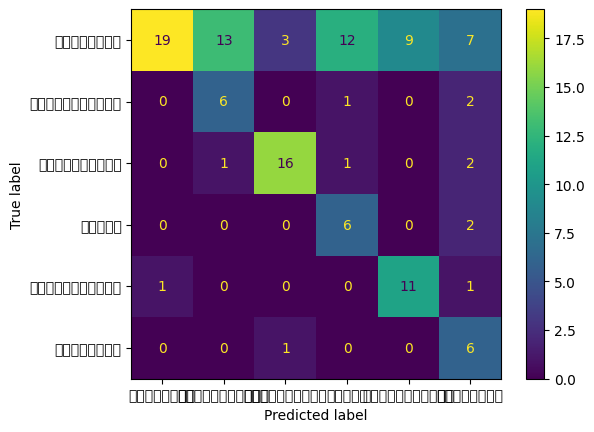

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_predictions, test_rand_df['label'])
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=test_rand_df['label'].unique()
)
disp.plot()

## Analysis

In [13]:
weights = pd.DataFrame(lr_text_classifier.coef_,
                       columns=vectorizer.get_feature_names_out(),
                       index=lr_text_classifier.classes_)

In [14]:
weights

,,\t,\t,,\t,,,,,,...,….,…หก,…”,‪#‎,‬,‬:,′,′ค,≠,☘
การเมือง,-0.065141,-0.027149,0.012814,0.105694,-0.181844,0.022451,-1.303138,-0.198444,0.006092,0.019837,...,-0.123043,0.011933,0.046591,-0.132500,-0.012110,0.011886,0.332985,0.024128,0.016442,-0.156307
คุณภาพชีวิต,0.019494,0.049685,-0.002017,0.189518,-0.000998,-0.389720,-0.162460,-0.003581,-0.000115,-0.001975,...,-0.028396,-0.001630,-0.012515,-0.024380,-0.030392,-0.003651,-0.066264,-0.005878,-0.001084,-0.039983
ต่างประเทศ,-0.352719,-0.004711,-0.002991,-0.044287,-0.002137,-0.799918,0.039776,-0.005050,-0.000385,-0.005405,...,0.266577,-0.001797,-0.016550,-0.016722,-0.069527,-0.002050,-0.050501,-0.002091,-0.006700,-0.017843
สังคม,0.105421,-0.002651,-0.002849,0.097826,-0.002067,-0.405911,-0.222364,-0.007050,-0.001550,-0.001565,...,-0.026879,-0.006304,-0.007484,-0.010786,-0.028174,-0.001603,-0.048819,-0.002943,-0.007335,0.231156
สิ่งแวดล้อม,0.340354,-0.002098,-0.004292,-0.471718,0.187363,1.760974,1.712447,0.216194,-0.003992,-0.009802,...,-0.077439,-0.001584,-0.004176,0.190467,0.151552,-0.002288,-0.120478,-0.001388,-0.000799,-0.004880
เศรษฐกิจ,-0.047410,-0.013076,-0.000665,0.122967,-0.000318,-0.187877,-0.064261,-0.002070,-0.000050,-0.001090,...,-0.010820,-0.000618,-0.005867,-0.006078,-0.011349,-0.002295,-0.046923,-0.011829,-0.000524,-0.012142


In [15]:
weights.transpose()

,การเมือง,คุณภาพชีวิต,ต่างประเทศ,สังคม,สิ่งแวดล้อม,เศรษฐกิจ
,-0.065141,0.019494,-0.352719,0.105421,0.340354,-0.047410
\t,-0.027149,0.049685,-0.004711,-0.002651,-0.002098,-0.013076
\t,0.012814,-0.002017,-0.002991,-0.002849,-0.004292,-0.000665
,0.105694,0.189518,-0.044287,0.097826,-0.471718,0.122967
\t,-0.181844,-0.000998,-0.002137,-0.002067,0.187363,-0.000318
...,...,...,...,...,...,...
‬:,0.011886,-0.003651,-0.002050,-0.001603,-0.002288,-0.002295
′,0.332985,-0.066264,-0.050501,-0.048819,-0.120478,-0.046923
′ค,0.024128,-0.005878,-0.002091,-0.002943,-0.001388,-0.011829
≠,0.016442,-0.001084,-0.006700,-0.007335,-0.000799,-0.000524


In [16]:
weights.transpose().sort_values('การเมือง', ascending=False)

,การเมือง,คุณภาพชีวิต,ต่างประเทศ,สังคม,สิ่งแวดล้อม,เศรษฐกิจ
พันธมิตร,2.764973,-0.795658,-0.161165,-0.164004,-1.269317,-0.374830
สุเทพ,2.673639,-0.651702,-1.203670,-0.499681,0.003969,-0.322555
นปช.,2.641290,-0.652513,-0.763536,-0.363480,-0.594568,-0.267192
สนธิ,2.461382,-0.454812,-0.705935,-0.337412,-0.792844,-0.170379
112,2.172064,-1.367884,-0.788483,1.097595,-0.788383,-0.324909
...,...,...,...,...,...,...
g,-2.014407,0.365540,0.006338,0.333321,-0.653653,1.962861
ฮอนดูรัส,-2.054578,-0.195208,2.588500,-0.115193,-0.149437,-0.074084
ซีเรีย,-2.247254,-0.529073,3.900277,-0.001145,-0.900688,-0.222116
โรฮิงญา,-2.345425,0.851346,2.228377,0.191295,-0.693320,-0.232274


In [17]:
weights.transpose().loc['พันธมิตร']

,พันธมิตร
การเมือง,2.764973
คุณภาพชีวิต,-0.795658
ต่างประเทศ,-0.161165
สังคม,-0.164004
สิ่งแวดล้อม,-1.269317
เศรษฐกิจ,-0.374830


In [18]:
pd.DataFrame(lr_text_classifier.intercept_, index=lr_text_classifier.classes_)

,0
การเมือง,1.806014
คุณภาพชีวิต,-0.952744
ต่างประเทศ,0.095075
สังคม,-0.921780
สิ่งแวดล้อม,1.780274
เศรษฐกิจ,-1.806839


In [19]:
weights_df = weights.transpose()

report_data = {}

for col in weights_df.columns:
    # Sort value in each columns
    sorted_col = weights_df[col].sort_values(ascending=False)
    
    # Get top 2 and least 2
    top_10 = sorted_col.head(10)
    
    # Combining data
    report_data[col] = top_10.index.tolist()

# Report dict to Report dataframe
report_df = pd.DataFrame(report_data)
print(report_df)

         การเมือง คุณภาพชีวิต   ต่างประเทศ           สังคม  สิ่งแวดล้อม  \
0        พันธมิตร       สปสช.      อียิปต์  พระเจ้าอยู่หัว       ซึนามิ   
1           สุเทพ      สุขภาพ       ซีเรีย       พุทธศาสนา  สิ่งแวดล้อม   
2            นปช.     ยูนิเซฟ     มาเลเซีย            พุทธ            *   
3            สนธิ       กสทช.       ทรัมป์             เพจ     จีเอ็มโอ   
4             112     คนพิการ     ฮอนดูรัส          ในหลวง           48   
5  ร่างรัฐธรรมนูญ     ผู้ป่วย        ตุรกี           ศาสนา           นก   
6    ประชาธิปัตย์     น้ำท่วม       สหรัฐฯ            เก่า                
7       มอนิเตอร์        ศปภ.        asean          ล้านนา                
8            2551       ขสมก.   ฟิลิปปินส์        ทางเลือก         นราฯ   
9      นิรโทษกรรม  ผู้เสียหาย  เกาหลีเหนือ          รางวัล         ทุ่ง   

         เศรษฐกิจ  
0        เศรษฐกิจ  
1         ดิจิทัล  
2      ทีดีอาร์ไอ  
3            ภาษี  
4  นักเศรษฐศาสตร์  
5          ธุรกิจ  
6               g  
7            ค

# Zero-shot LLM Classifier

In [20]:
import os
from dotenv import load_dotenv
from getpass import getpass

# Load variables from .env file
load_dotenv()

# Access the variables
TYPHOON_API_KEY = os.getenv("TYPHOON_API_KEY")
if TYPHOON_API_KEY is None:
    TYPHOON_API_KEY = getpass("Enter Typhoon API Key:")

# GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")
# if GOOGLE_API_KEY is None:
#     GOOGLE_API_KEY = os.getpass("Enter Google API Key:")

In [21]:
import re

def clean_text(text):
    text = re.sub(r'\|', '', text)

    return text

## Typhoon

In [22]:
from openai import OpenAI

def analyze_topic(text):

    client = OpenAI(
        api_key=TYPHOON_API_KEY,
        base_url='https://api.opentyphoon.ai/v1'
    )

    messages = [
        {
            "role": "system", 
            "content": """You are a news headline classifier. You must analyze a news headline given by user's prompt, 
            then classify a topic of that headline with one of the following choice: 'การเมือง', 'สิ่งแวดล้อม', 'ต่างประเทศ', 'คุณภาพชีวิต', 'เศรษฐกิจ', 'สังคม'. 
            Output must be label string only.
            """
        },
        {
            "role": "User",
            "content": text
        }
    ]

    response = client.chat.completions.create(
        model="typhoon-v2.5-30b-a3b-instruct",
        messages=messages,
    )

    return response.choices[0].message.content

In [23]:
text = clean_text(dev_df['title tokens'].loc[1234])
print(text)
print(analyze_topic(text))

คณะรัฐประหารฟิจิประกาศภาวะฉุกเฉิน เตือนกร้าวจะปราบผู้ต้านอย่างหนัก


KeyboardInterrupt: 

In [ ]:
test_predictions = []

for text in random_df['title tokens']:
    text = clean_text(text)
    typhoon_label = analyze_topic(text)
    test_predictions.append(typhoon_label)

In [ ]:
print(test_predictions)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_predictions, random_df['label']))

## Gemini